In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
# import fastai
from fastai.imports import *

In [2]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

from pathlib import Path

In [3]:
PATH = "data/data-science-bowl-2018/"
arch=resnet34
sz=224
bs=64

In [4]:
path = Path(f'{PATH}'); list(path.iterdir())[:5]

[PosixPath('data/data-science-bowl-2018/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5'),
 PosixPath('data/data-science-bowl-2018/c395870ad9f5a3ae651b50efab9b20c3e6b9aea15d4c731eb34c0cf9e3800a72'),
 PosixPath('data/data-science-bowl-2018/c322c72b9d411e631580fee9312885088b4bb14ed297aa4b246ec943533b3ffb'),
 PosixPath('data/data-science-bowl-2018/9ebcfaf2322932d464f15b5662cae4d669b2d785b8299556d73fffcae8365d32'),
 PosixPath('data/data-science-bowl-2018/ecb36c90cdd20245d89173c106f3c6a2d124d07bdea0ae202fb1efa49b0cd169')]

In [5]:
pics = {}
idx = ''

for samples in list(path.iterdir()):
    sample = {}
    masks = []
    if(samples.is_dir()):
        for folders in list(samples.iterdir()):
            
#             print(folders.name)
#             print("FUCK") if len(list(folders.iterdir())) < 2 else print(len(list(folders.iterdir())))
            
            if(folders.name == 'images'):
                for p in list(folders.iterdir()):
                    idx = str(p).split('/')[-1].replace('.png', '')
                    sample['image'] = str(p)
#                     pics[idx] = sample
#                     print('images')
            if(folders.name == 'masks'):
#                 print("FUCK") if len(list(folders.iterdir())) == 0 else print(len(list(folders.iterdir())))
                for m in list(folders.iterdir()):
                    masks.append(str(m))
#                     print('masks')
        sample['masks'] = masks
        pics[idx] = sample
#         print(pics[idx])

In [6]:
len(pics)
pictures = list(map(lambda i: pics[i]['image'], pics));
masks = list(map(lambda i: pics[i]['masks'], pics)); len(masks[1])


114

# Merge mask images
each image should have 1 corresponding mask img

(1024, 1024, 4)

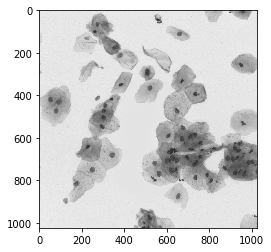

In [7]:
img1 =  plt.imread(pictures[1]); plt.imshow(img1); img1.shape

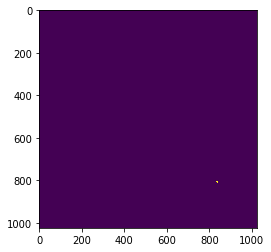

In [8]:
mask1 = plt.imread(masks[1][0]); plt.imshow(mask1) ; 

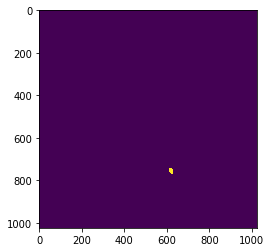

In [9]:
mask2 = plt.imread(masks[1][1]); plt.imshow(mask2)

In [10]:
mask1 == mask2

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [11]:
comb_mask = (mask1 != mask2).astype(int)

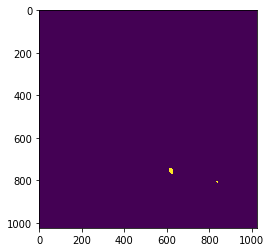

In [12]:
plt.imshow(comb_mask)

In [13]:
mask_set_1 = masks[0]; len(mask_set_1)

9

In [14]:
## combines masks into single image
def combine_masks(mask_list):
    combined = None
    for mask_fn in mask_list:
        mask_image = plt.imread(mask_fn)
        combined = mask_image if type(combined) is not np.ndarray else combined
        combined = (combined != mask_image).astype(int)
    return combined if len(mask_list) > 0 else False


In [15]:
masks[10]

[]

In [16]:
def img_and_mask(i, a=0.5):
    fig, axes = plt.subplots(1, 1, figsize=(8, 8))
    ax = axes
    ax.imshow(plt.imread(pictures[i]))
    mask = combine_masks(masks[i])
    ax.imshow(mask, alpha=a) if type(mask) == np.ndarray  else ax.set_title("NO MASK")

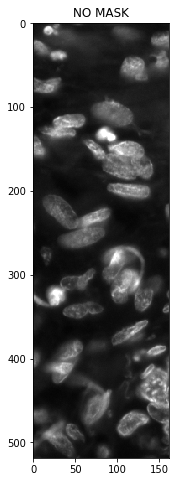

In [17]:
img_and_mask(10, 0.5)

In [18]:
masks_per_img = [len(m) for m in masks]

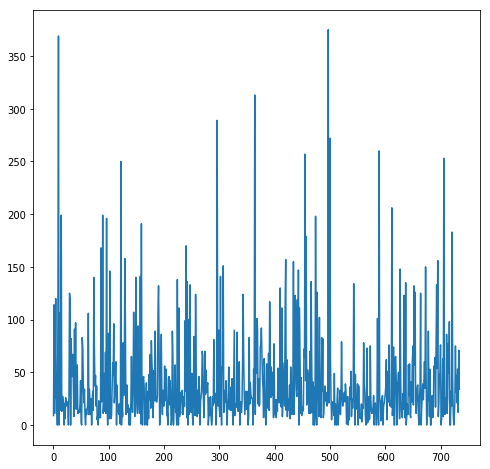

In [19]:
fig, axes = plt.subplots(1, 1, figsize=(8, 8))
ax = axes
ax.plot(masks_per_img)

In [20]:
len(list(filter(lambda x: x == 0, masks_per_img)))

65

### CHeck out the sizes of all the images

In [21]:
image_sizes = [plt.imread(fn).shape[:2] for fn in pictures]
image_hs = [t[0] for t in image_sizes]
image_ws = [t[1] for t in image_sizes]

Text(0.5,1,'Image Widths')

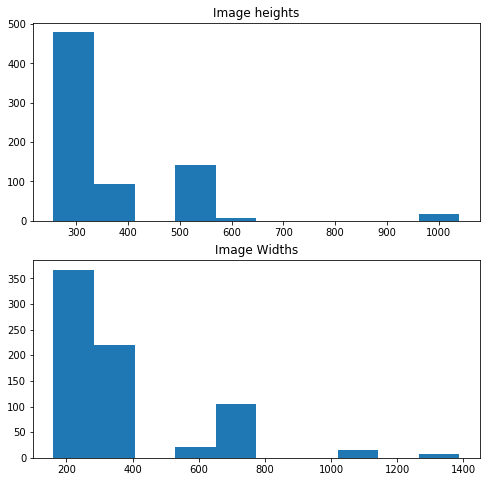

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))
height, width = axes
height.hist(image_hs)
height.set_title("Image heights")
width.hist(image_ws)
width.set_title("Image Widths")

In [23]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

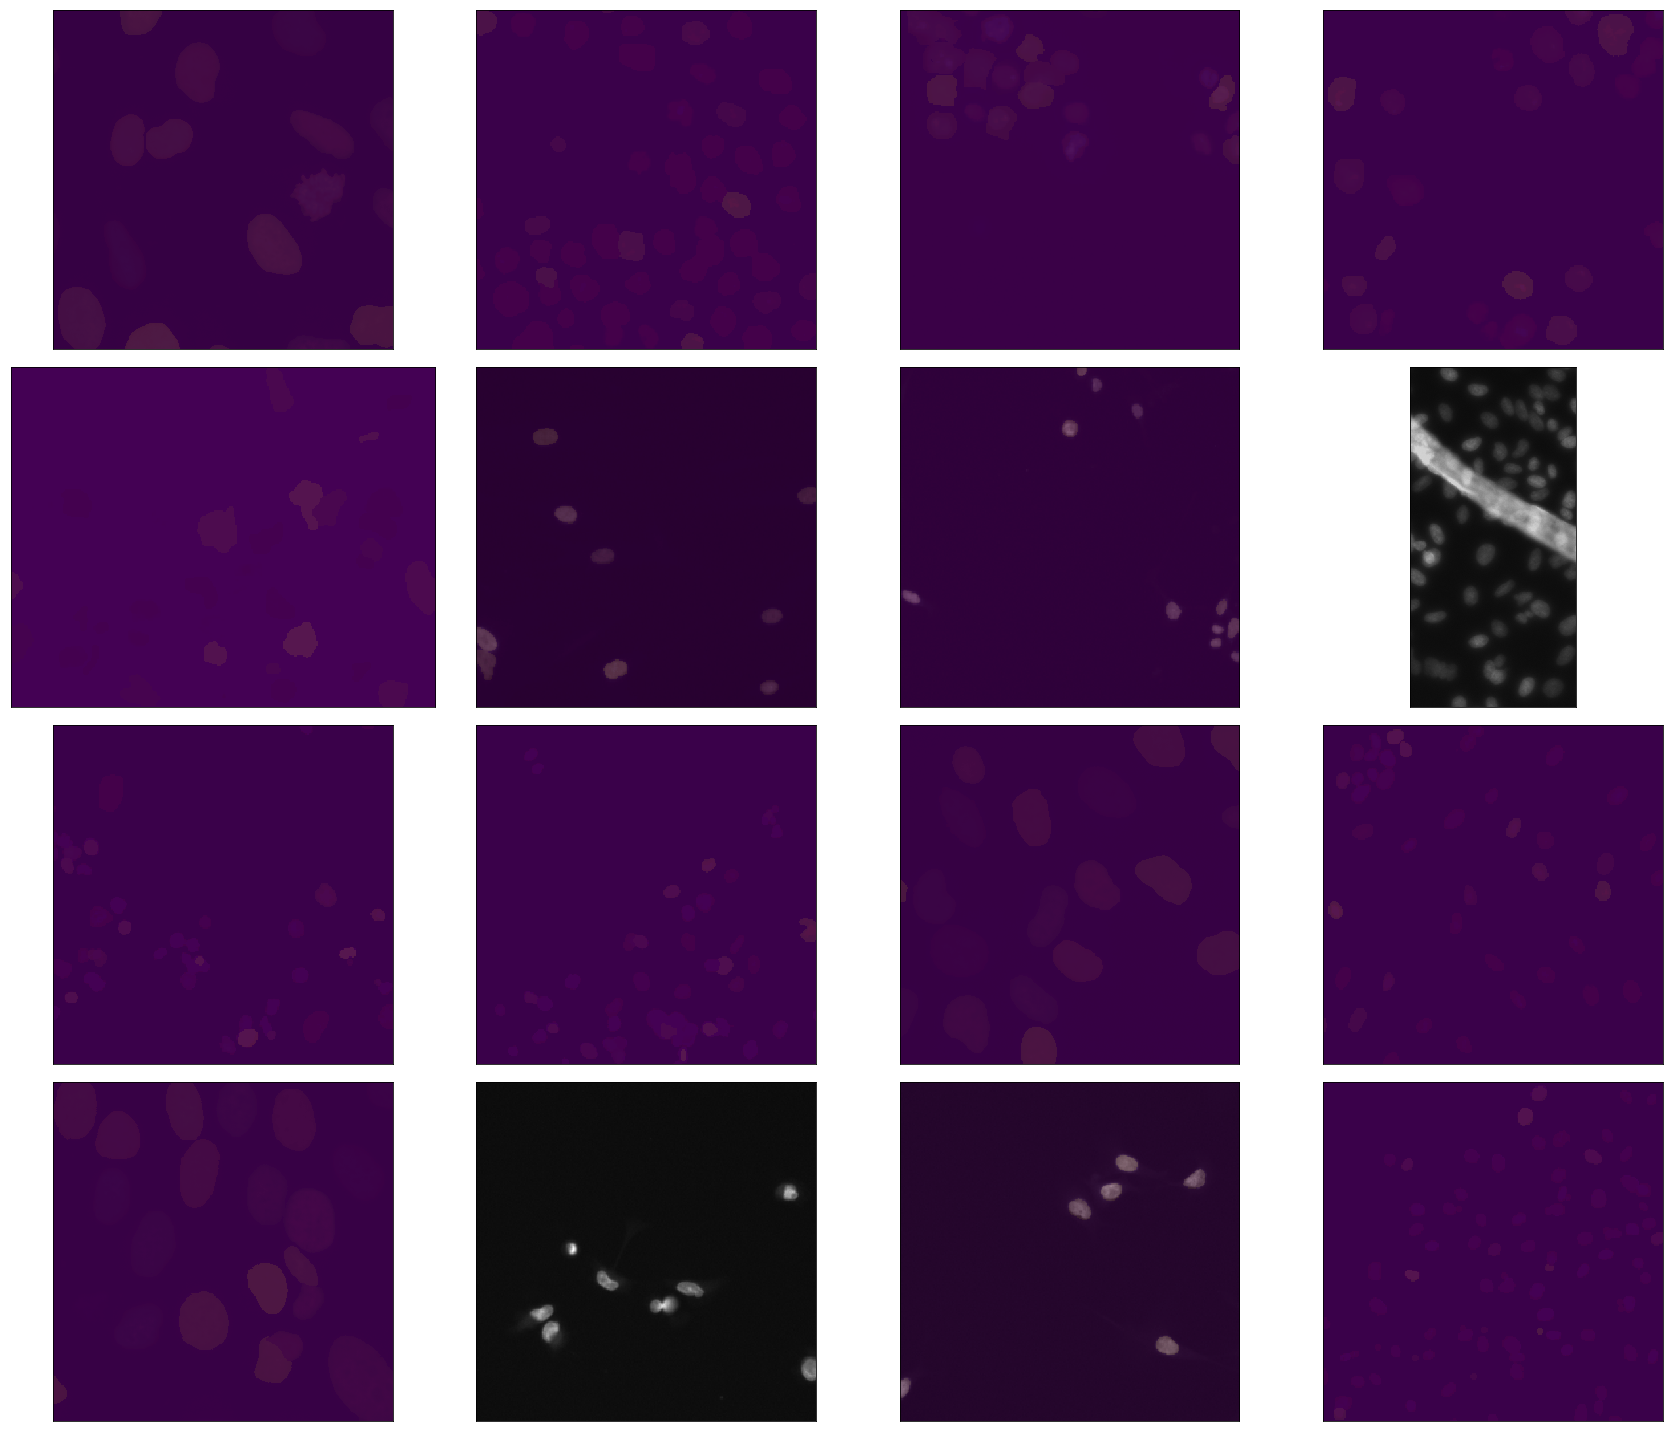

In [24]:
fig, axes = plt.subplots(4, 4, figsize=(24, 20))
for i,ax in enumerate(axes.flat):
    ima = plt.imread(pictures[i+200])
#     b = md.classes[preds[i]]
    ax = show_img(ima, ax=ax)
    for mask in masks[i+200]:
        ax.imshow(plt.imread(mask), alpha=0.1)
#     draw_text(ax, (0,0), b)
plt.tight_layout()

In [25]:
df = pd.read_csv(f'{PATH}stage1_train_labels.csv'); df.head()

,ImageId,EncodedPixels
0,00071198d059ba7f5914a526d124d28e6d010c92466da2...,6908 1 7161 8 7417 8 7672 9 7928 9 8184 9 8440...
1,00071198d059ba7f5914a526d124d28e6d010c92466da2...,36269 7 36523 11 36778 13 37033 15 37288 17 37...
2,00071198d059ba7f5914a526d124d28e6d010c92466da2...,19919 6 20174 8 20429 10 20685 11 20941 12 211...
3,00071198d059ba7f5914a526d124d28e6d010c92466da2...,18671 6 18926 8 19181 9 19436 10 19691 11 1994...
4,00071198d059ba7f5914a526d124d28e6d010c92466da2...,40158 3 40413 5 40669 5 40925 5 41182 3
